# Sample of Dataset of Similar Side Effects

In [1]:
dataset = []
with open('./data/side_effects.txt', 'r') as file:
    for line in file:
        dataset.append(line.strip())

In [2]:
from utils.embeddings import genEmbsBert

nDat = 100
all_effects = dataset[:nDat]
output = genEmbsBert(all_effects, padding=True)
output = output.view(nDat, 16, -1)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

In [3]:
print(output)

tensor([[[-0.9274, -0.3387, -0.3689,  ..., -0.0796,  0.2169,  0.6585],
         [ 0.0619,  0.0591,  0.9740,  ..., -0.4120,  1.0172, -0.1051],
         [ 0.1982,  0.6403, -0.3270,  ..., -0.3233, -0.6650,  0.1322],
         ...,
         [-0.7611,  0.3775, -0.0590,  ..., -0.4050, -0.2079,  0.0385],
         [-0.4995, -0.1606, -0.4288,  ...,  0.1474,  0.1843,  0.1169],
         [ 0.0959, -0.0192, -0.0467,  ...,  0.2498, -0.1639,  0.5791]],

        [[-0.5271,  0.0358, -0.6320,  ..., -0.2792, -0.3543, -0.1342],
         [-0.0764,  0.1802,  0.0262,  ..., -0.2553, -0.0366, -0.5709],
         [ 0.4598, -0.3488,  0.2032,  ..., -0.2098, -0.4253,  0.6364],
         ...,
         [-0.3504,  0.2010, -0.1181,  ..., -0.3346, -0.5126,  0.0709],
         [-0.3897, -0.1778, -0.3482,  ..., -0.1530,  0.3014,  0.0672],
         [ 0.1296,  0.2871,  0.1127,  ..., -0.0137, -0.4968,  0.0070]],

        [[-0.5798,  0.1055, -0.7925,  ..., -0.1761, -0.4964,  0.2820],
         [-0.5885,  0.8369,  0.4069,  ...,  0

In [4]:
print(output.shape)

torch.Size([100, 16, 1008])


In [5]:
import torch
from sklearn.decomposition import PCA
from tqdm import tqdm

reduced_x = torch.empty((0,256), dtype=torch.float32)

for X in tqdm(output):

    pca = PCA(n_components=16)
    pca.fit(X.detach().numpy())

    X_reduced = torch.from_numpy(pca.transform(X.detach().numpy()))
    OneD_reduced_x = torch.empty((0), dtype=torch.float32)
    for xr in X_reduced:
        OneD_reduced_x = torch.cat((OneD_reduced_x, xr), 0)

    reduced_x = torch.cat((reduced_x,OneD_reduced_x.unsqueeze(0)), 0)
    
print(reduced_x.shape)
print(reduced_x)

100%|██████████| 100/100 [00:00<00:00, 199.94it/s]


torch.Size([100, 256])
tensor([[-1.0742e+01, -2.0832e-01,  1.2577e+01,  ...,  9.7974e+00,
          2.1423e+00,  1.5423e-06],
        [ 1.4328e+01,  5.9725e+00, -6.6283e-01,  ..., -1.6868e+00,
         -4.2743e+00, -3.1665e-06],
        [-7.2741e+00,  1.4096e+01,  2.9837e+00,  ...,  1.2846e+00,
         -3.5985e+00, -6.9104e-07],
        ...,
        [-3.9099e+00,  1.0562e+01, -2.6262e+00,  ..., -4.8895e-02,
          8.9855e-01, -1.5646e-06],
        [-6.3500e+00,  6.5814e+00,  1.2963e+01,  ...,  3.5954e+00,
          8.4504e+00, -1.9446e-06],
        [ 1.4218e+01, -3.9512e+00, -5.3475e+00,  ...,  2.5780e-01,
          1.3860e+00, -5.1185e-06]])


In [6]:
print(reduced_x)

tensor([[-1.0742e+01, -2.0832e-01,  1.2577e+01,  ...,  9.7974e+00,
          2.1423e+00,  1.5423e-06],
        [ 1.4328e+01,  5.9725e+00, -6.6283e-01,  ..., -1.6868e+00,
         -4.2743e+00, -3.1665e-06],
        [-7.2741e+00,  1.4096e+01,  2.9837e+00,  ...,  1.2846e+00,
         -3.5985e+00, -6.9104e-07],
        ...,
        [-3.9099e+00,  1.0562e+01, -2.6262e+00,  ..., -4.8895e-02,
          8.9855e-01, -1.5646e-06],
        [-6.3500e+00,  6.5814e+00,  1.2963e+01,  ...,  3.5954e+00,
          8.4504e+00, -1.9446e-06],
        [ 1.4218e+01, -3.9512e+00, -5.3475e+00,  ...,  2.5780e-01,
          1.3860e+00, -5.1185e-06]])


# Visualize Data

#

In [7]:
def indexer(nrows: int) -> int:
    global dataset
    return sum([len(row) for row in dataset[:nrows]])

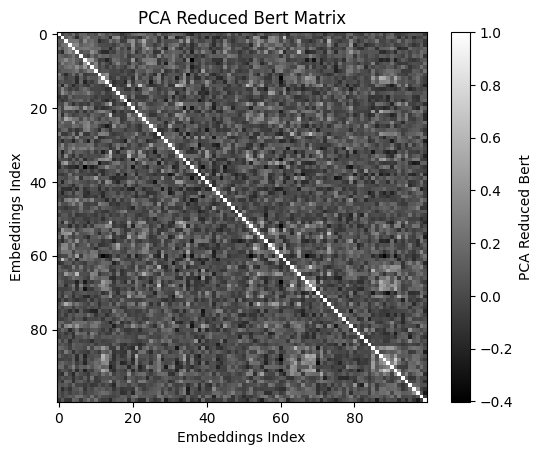

In [8]:
from utils.similarity import *
import numpy as np

matrix = cosine_similarity_matrix(reduced_x[:nDat])
plot_similarity_matrix(matrix, 'PCA Reduced Bert',cmap='gray')

# t-SNE

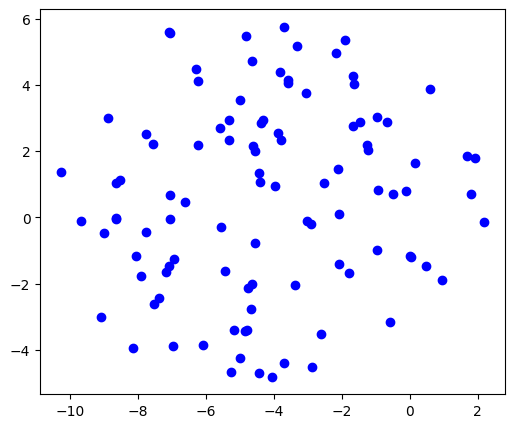

In [9]:
# t-sne
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(reduced_x[:nDat])

plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='blue')
plt.show()
